**Name:** <span style="color:red">Jan Izquierdo</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 2)
# Network percolation

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to `practical9_name1_name2.ipynb`, where `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study the percolation transition in random networks. To that end we will use the Python package `NetworkX`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import poisson

First, use the **NetworkX** function `erdos_renyi_graph` to generate an Erdös-Renyi random network with $n=10000$ nodes and connection probability $p=0.0005$. Plot the degree distribution.

In [3]:
nw=nx.erdos_renyi_graph(n=10000, p=0.0005)
nw.number_of_nodes()
degrees=dict(nw.degree()) #node:degreee
np.mean(list(degrees.values()))

4.9474

Text(0, 0.5, 'Frequency')

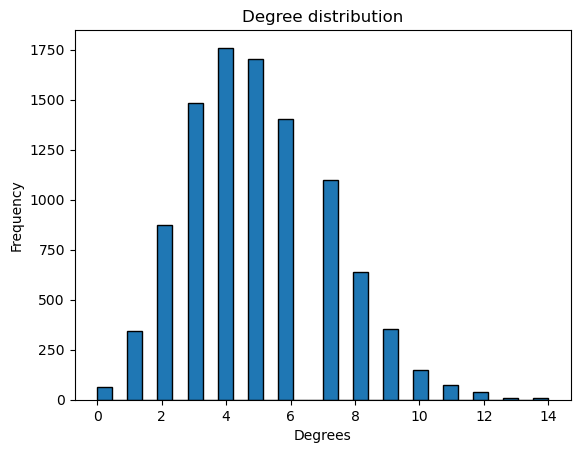

In [4]:
plt.hist(x=degrees.values(), bins=30, edgecolor="Black")
plt.title("Degree distribution")
plt.xlabel("Degrees")
plt.ylabel("Frequency")

---

<span style="color:red">Comment your result here</span>

---

Verify that the degree distribution obtained above matches a Poisson distribution with mean equal to the average degree of the network.

10000


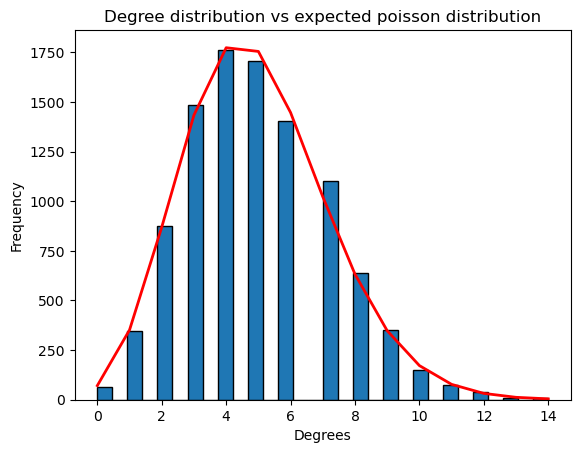

In [5]:

#degrees.values()
avg_degree = np.mean(list(degrees.values()))

allDegrees = np.arange(0, max(degrees.values()) + 1)
poisson_samples=poisson.pmf(allDegrees, avg_degree) * len(degrees.values()) #Multiply by 10000 to scale the poisson dstribution data to our data

print(len(degrees.values()))
plt.hist(x=degrees.values(), bins=30, edgecolor="Black")
plt.plot(allDegrees, poisson_samples, linewidth=2, color="red")
plt.title("Degree distribution vs expected poisson distribution")
plt.xlabel("Degrees")
plt.ylabel("Frequency")
plt.show()

We will now study the percolation transition discussed in class. To that end, generate an ensemble of Erdös-Renyi networks (e.g. 100 networks) with 1000 nodes each. Compute for each network the fraction of nodes that belong to the largest connected component, and calculate its average over the ensemble of networks with a given connection probability $p$. Repeat this calculation for a range of values of $p$ between $0$ and $10/n$, with $n$ being the number of nodes of the network.

In [8]:
np.random.seed(1)
def con_comp_nodes(n, p):
    nw=nx.erdos_renyi_graph(n, p)
    u_nw=nw.to_undirected()
    m_component=max(nx.connected_components(u_nw))
    m_nw=nw.subgraph(m_component).to_undirected().copy()
    nnodes=m_nw.number_of_nodes()
    return nnodes

n=1000
plist=np.linspace(0,10/n, 10)
crossPmean=[]

#p in a nested for loop (outer)use np.linspace(0, 10/n, k) to get list of values to use as p (k is len of list you want to obtain)
for p in plist:
    print("P is:",p)
    nnode_list=[]
    for _ in range(100):
        nnode_list.append(con_comp_nodes(n, p))

    avg_nnode=np.mean(nnode_list)
    crossPmean.append(avg_nnode)

print(crossPmean)


print("The average number of nodes in the largest connected component acorss different p values is", np.mean(crossPmean))

[0.         0.00111111 0.00222222 0.00333333 0.00444444 0.00555556
 0.00666667 0.00777778 0.00888889 0.01      ]
0.0
0.0011111111111111111
0.0022222222222222222
0.003333333333333333
0.0044444444444444444
0.005555555555555556
0.006666666666666666
0.0077777777777777776
0.008888888888888889
0.01
[782.99, 724.9, 876.05, 823.24, 767.9, 794.02, 782.81, 854.41, 828.61, 775.01]
The average number of nodes in the largest connected component is 800.9939999999999


Finally, plot the transition curve.

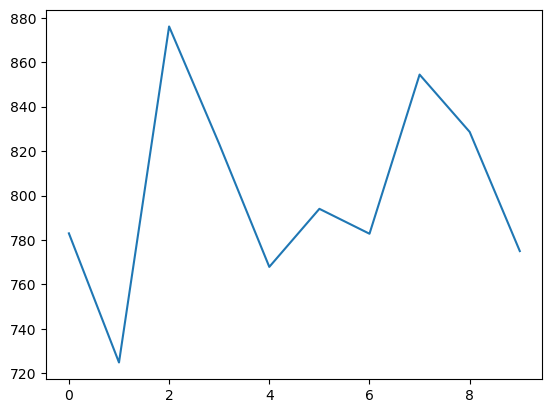

In [10]:
plt.plot()

---

<span style="color:red">Comment your result here</span>

---